In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# Dot Product with RMSE loss function

In [2]:
from helpers import load_data

DATA_TRAIN_PATH = "data/data_train.csv"
ratings = load_data(DATA_TRAIN_PATH)

DATA_TEST_PATH = "data/sampleSubmission.csv"
samples = load_data(DATA_TEST_PATH)

In [4]:
n_users = len(ratings.user_id.unique())
n_movies = len(ratings.movie_id.unique())

In [34]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings, test_size=0.1, random_state=42)

In [33]:
test.head()

AttributeError: 'bool' object has no attribute 'head'

In [6]:
#creating movie embedding path
movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(n_movies+1, 5, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
1059256/1059256 [==============================] - 41s 38us/step - loss: 1.0304
Epoch 2/5
1059256/1059256 [==============================] - 39s 37us/step - loss: 1.0200
Epoch 3/5
1059256/1059256 [==============================] - 43s 40us/step - loss: 1.0094
Epoch 4/5
1059256/1059256 [==============================] - 42s 40us/step - loss: 0.9990
Epoch 5/5
1059256/1059256 [==============================] - 44s 41us/step - loss: 0.9904


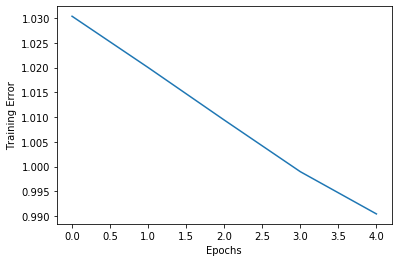

In [31]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.movie_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [35]:
model.evaluate([test.user_id, test.movie_id], test.rating)

117696/117696 [==============================] - 1s 12us/step


1.0191964326004026

In [37]:
pred = model.predict([test.user_id.head(10), test.movie_id.head(10)])

[print(pred[i], test.rating.iloc[i]) for i in range(0,10)]

[4.023247] 2
[4.2492046] 4
[4.298243] 4
[3.5504441] 1
[3.8682034] 4
[4.804299] 4
[3.5870364] 5
[4.8493524] 4
[4.6978064] 4
[5.30523] 5


[None, None, None, None, None, None, None, None, None, None]

In [38]:
prediction = model.predict([samples.user_id, samples.movie_id])

In [39]:
submission = load_data(DATA_TEST_PATH)
submission['rating'] = prediction

In [40]:
from helpers import create_csv

DATA_SUBMISSION = "data/submission_dotprodbase.csv"
create_csv(DATA_SUBMISSION, submission)

In [46]:
t = False
for i in range(submission.index.stop):
    if (submission.rating[i] == 7):
        t = True

In [47]:
print(t)

False
